MINI PROJECT WITH IRIS DATASET

In [30]:
#Import Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load datasets
from sklearn.datasets import load_iris

# Preprocessing tools (optional, for scaling)
from sklearn.preprocessing import StandardScaler

# Model
from sklearn.linear_model import LinearRegression

# Train/test split
from sklearn.model_selection import train_test_split

# Metrics to evaluate model
from sklearn.metrics import mean_squared_error, r2_score

In [14]:
#Load the Iris dataset

iris = load_iris()

In [15]:
iris = load_iris()  # ✅ parentheses are important
print(iris.data[:5])  # prints first 5 rows of features
print(iris.target)  # prints first 5 labels
print(iris.target_names) #print target_names
print(iris.feature_names)  # prints first 5 labels

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
['setosa' 'versicolor' 'virginica']
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [16]:
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['species'] = iris.target
print(df.head(5))
print("\n\n")
print(df.describe())
print("\n\n")
print(df.info())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   species  
0        0  
1        0  
2        0  
3        0  
4        0  



       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4

In [17]:
print(df['species'].value_counts())

species
0    50
1    50
2    50
Name: count, dtype: int64


In [18]:
print(df.loc[100, ['sepal length (cm)', 'sepal width (cm)']], "\n")
print(df.iloc[100, [0, 1]])

sepal length (cm)    6.3
sepal width (cm)     3.3
Name: 100, dtype: float64 

sepal length (cm)    6.3
sepal width (cm)     3.3
Name: 100, dtype: float64


In [19]:
df.rename(columns={
    'sepal length (cm)': 'sepal length',
    'sepal width (cm)': 'sepal width',
    'petal length (cm)': 'petal length',
    'petal width (cm)': 'petal width'
}, inplace=True)


print(df.columns)


Index(['sepal length', 'sepal width', 'petal length', 'petal width',
       'species'],
      dtype='object')


In [20]:
#Map Numeric Labels to Species Names (optional but helpful)

iris_labels = {0: 'setosa', 1: 'versicolor', 2: 'virginica'}
df['species_name'] = df['species'].map(iris_labels)
print(df[['species', 'species_name']].iloc[20:121:50], "\n")
print(df[['species', 'species_name']].sample(n=5))


     species species_name
20         0       setosa
70         1   versicolor
120        2    virginica 

     species species_name
138        2    virginica
27         0       setosa
107        2    virginica
4          0       setosa
15         0       setosa


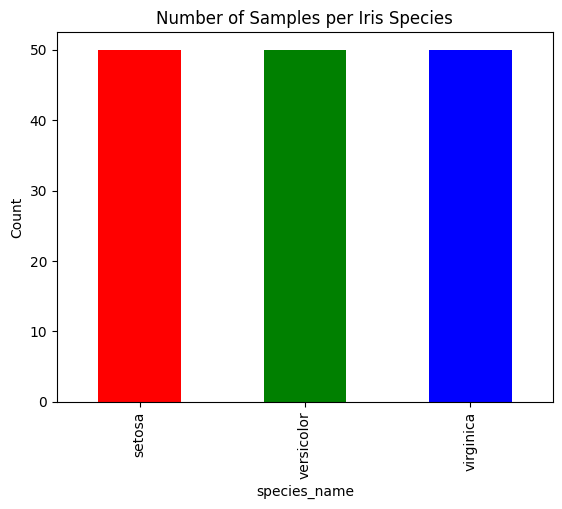

In [21]:
#Quick Visualization of Labels

import matplotlib.pyplot as plt

df['species_name'].value_counts().plot(kind='bar', color=['red', 'green', 'blue'])
plt.title("Number of Samples per Iris Species")
plt.ylabel("Count")
plt.show()


This data set in already cleaned. But in real-world datasets, we must always clean before visulaization

steps: 
1.Check for missing values, duplicated values and handle them
    
    print(df.isna().sum())
    df['sepal length (cm)'].fillna(df['sepal length (cm)'].mean(), inplace=True)
    df.dropna(inplace=True)

    print(df.duplicated().sum())

    df.drop_duplicates(inplace=True)
    
2.Check data types

    print(df.dtypes)
**Rule of thumb: ML algorithms expect numbers, so you must convert everything else to numeric form. --> FEATURE PREPROCESSING**

3.Outlier detection

For real-world data, you might check with boxplots:

    import seaborn as sns
    sns.boxplot(x='species_name', y='petal length (cm)', data=df)



              sepal length  sepal width  petal length  petal width
sepal length      1.000000    -0.117570      0.871754     0.817941
sepal width      -0.117570     1.000000     -0.428440    -0.366126
petal length      0.871754    -0.428440      1.000000     0.962865
petal width       0.817941    -0.366126      0.962865     1.000000


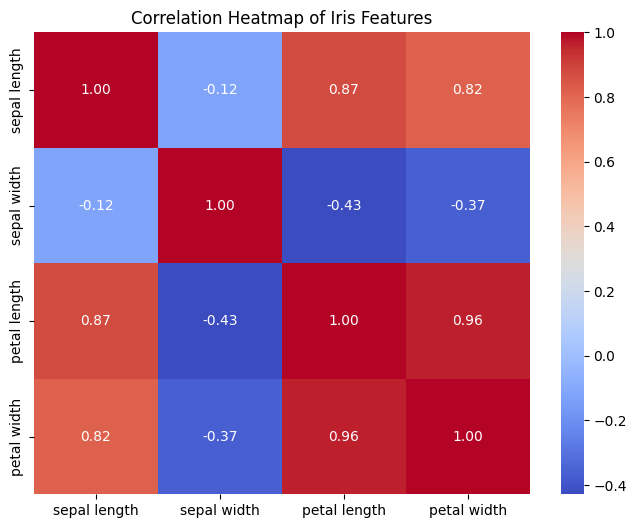

In [36]:
#Correlation Heatmap

import seaborn as sns
import matplotlib.pyplot as plt

# Compute correlation matrix
corr = df.iloc[:, :4].corr()   # only the numeric features
print(corr)
# Plot heatmap
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap of Iris Features")
plt.show()


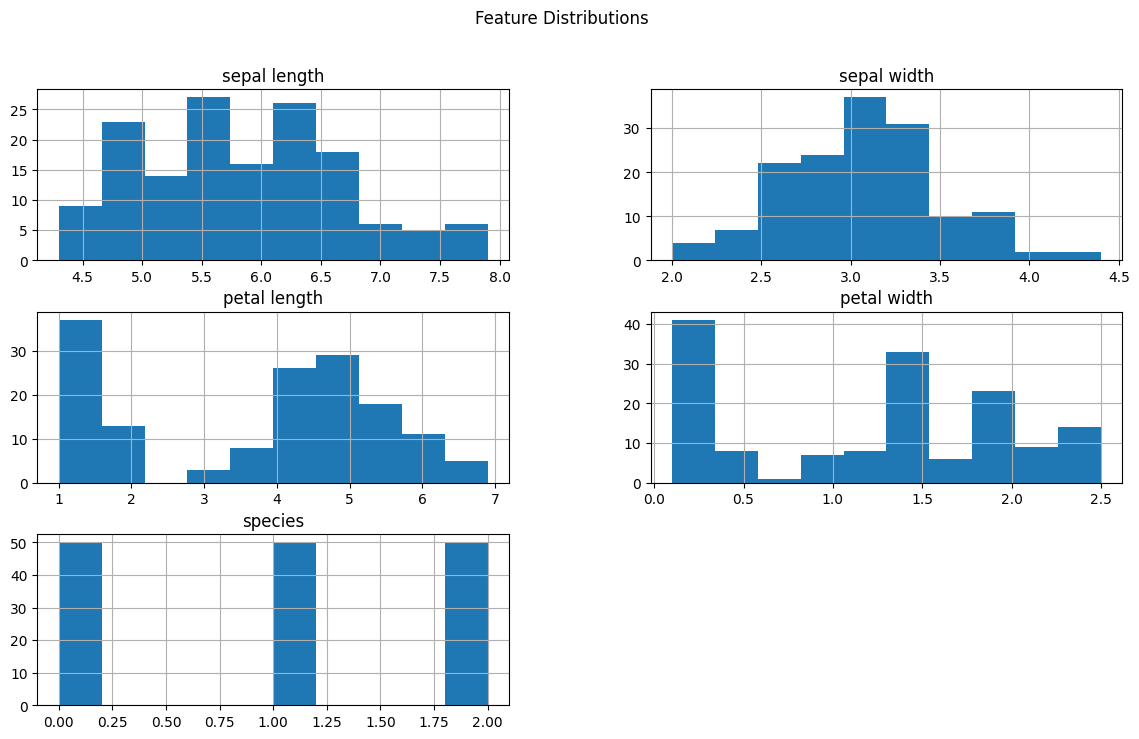

In [ ]:
#Feature Histograms

df.hist(figsize=(14,8))
plt.suptitle("Feature Distributions")
plt.show()

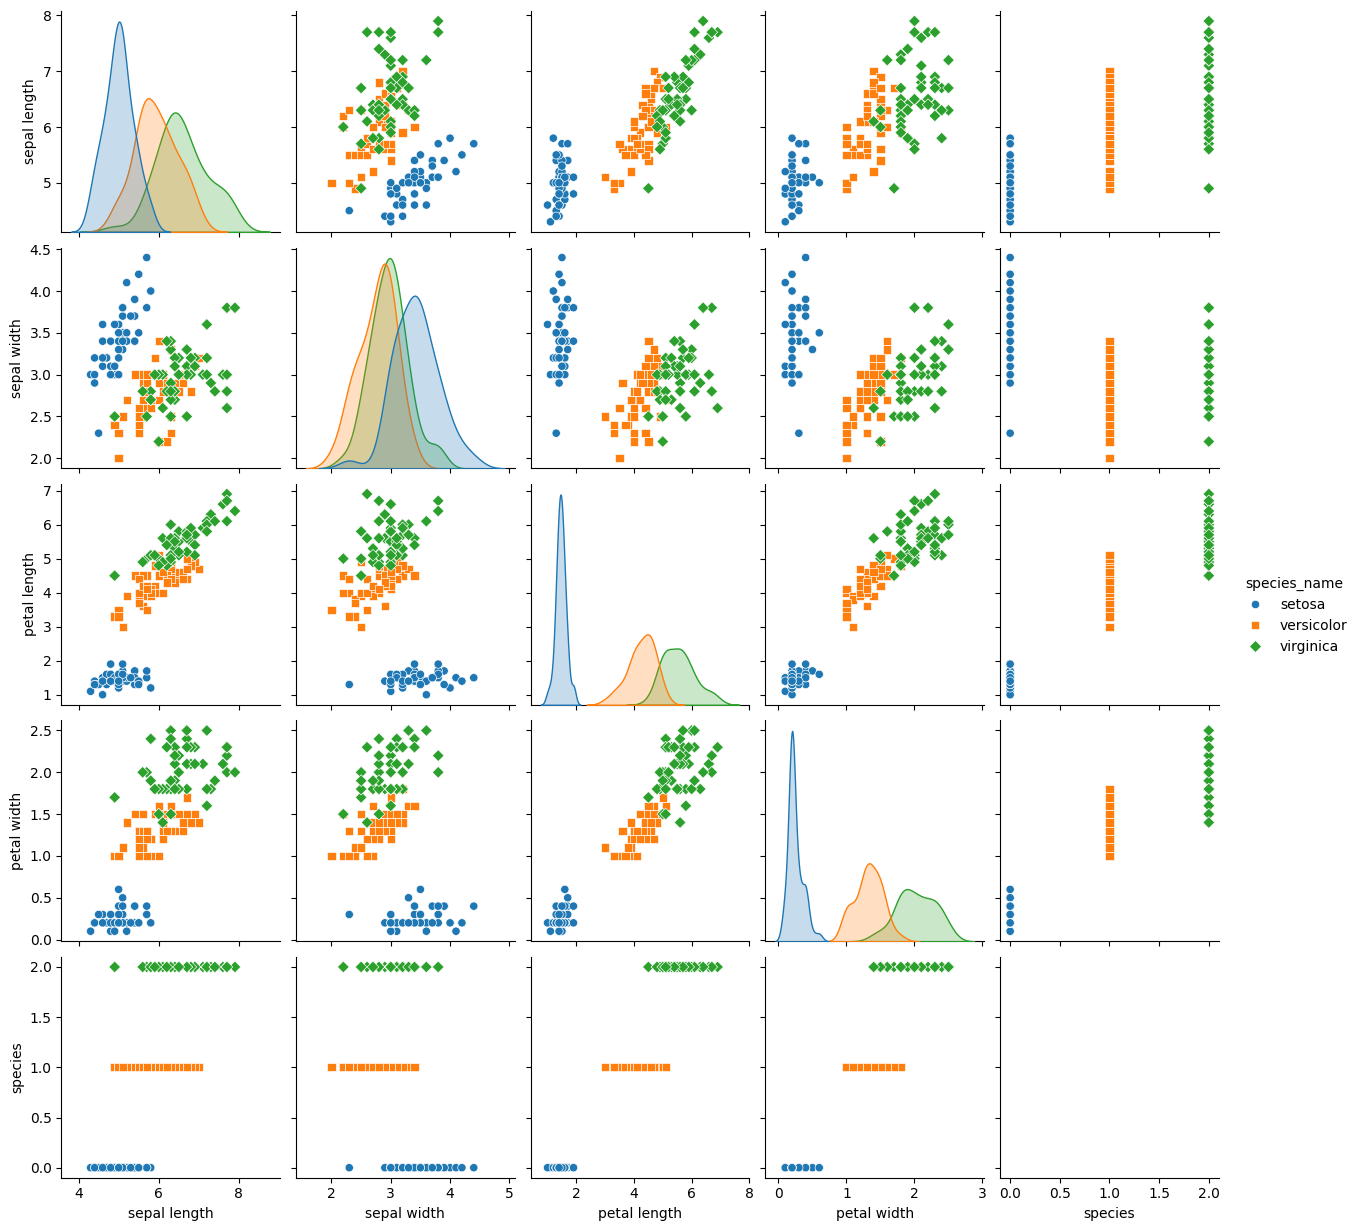

In [ ]:
#Scatter Plots

sns.pairplot(df, hue="species_name", markers=["o", "s", "D"])
plt.show()

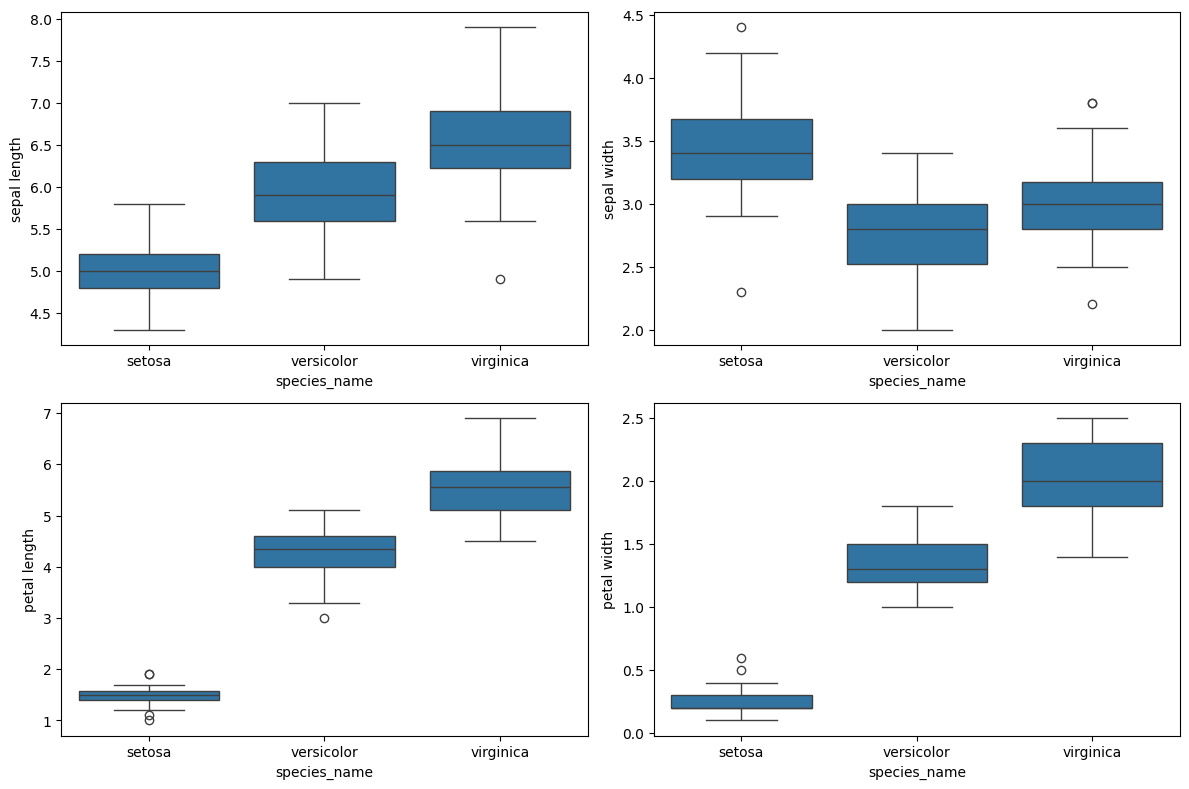

In [34]:
#Boxplots for Each Feature by Label

plt.figure(figsize=(12,8))
for i, col in enumerate(df.columns[:4], 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x="species_name", y=col, data=df)
plt.tight_layout()
plt.show()


In [47]:
#Normalization

X = df[["sepal length", "sepal width", "petal width"]]
y = df["petal length"] # for example, predicting petal length from other features(y would be species[0, 1, 2] normally.)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print(X_scaled[:5])

[[-0.90068117  1.01900435 -1.3154443 ]
 [-1.14301691 -0.13197948 -1.3154443 ]
 [-1.38535265  0.32841405 -1.3154443 ]
 [-1.50652052  0.09821729 -1.3154443 ]
 [-1.02184904  1.24920112 -1.3154443 ]]


In [50]:
#Split Data into Training and Testing

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

#test_size=0.2 → 20% data for testing, 80% for training.
#random_state → makes results reproducible.(like seed=42)

In [55]:
#Train a Linear Rigression Model

model = LinearRegression()
model.fit(X_train, y_train)

coefficients = pd.DataFrame({
    "Feature": X.columns,
    "Coefficient": model.coef_
})
print(coefficients)

print("Intercept:", model.intercept_)


        Feature  Coefficient
0  sepal length     0.596540
1   sepal width    -0.276206
2   petal width     1.114867
Intercept: 3.7775984223630585


In [54]:
#Evaluate Model

from sklearn.metrics import mean_squared_error, r2_score

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R² Score:", r2)


Mean Squared Error: 0.1300162603138267
R² Score: 0.9603293155857664


In [ ]:
#Visualizing Predictions vs Actual Values

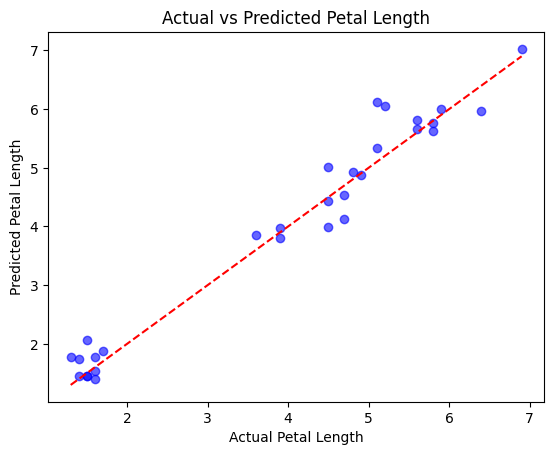

In [58]:
#Scatter Plot of Predictions vs Actual

plt.scatter(y_test, y_pred, color="blue", alpha=0.6)
plt.xlabel("Actual Petal Length")
plt.ylabel("Predicted Petal Length")
plt.title("Actual vs Predicted Petal Length")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # perfect line
plt.show()


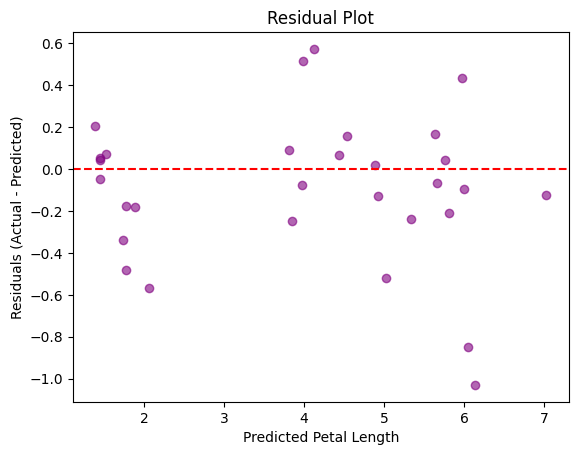

In [59]:
# Residual Plot

residuals = y_test - y_pred

plt.scatter(y_pred, residuals, color="purple", alpha=0.6)
plt.axhline(y=0, color="red", linestyle="--")
plt.xlabel("Predicted Petal Length")
plt.ylabel("Residuals (Actual - Predicted)")
plt.title("Residual Plot")
plt.show()
